# Modelling the Quantum Harmonic Oscillator with Haussian Functions

The Harmonic Oscillator solutions are given by the following equation:


$$ \psi_n(x) = \left( \frac{m \omega}{\pi \hbar} \right)^{1/4} \frac{1}{\sqrt{2^n n!}} H_n\left( \sqrt{\frac{m \omega}{\hbar}} x \right) e^{-\frac{m \omega x^2}{2 \hbar}} $$


In a sense we have a hermite function, multiplied by a gaussian function and some kind of normalization constant.

We can first of all model this solutions if we just consider the Hermite polynomials multiplied by the Gaussian function, we can carry out normalization later on.

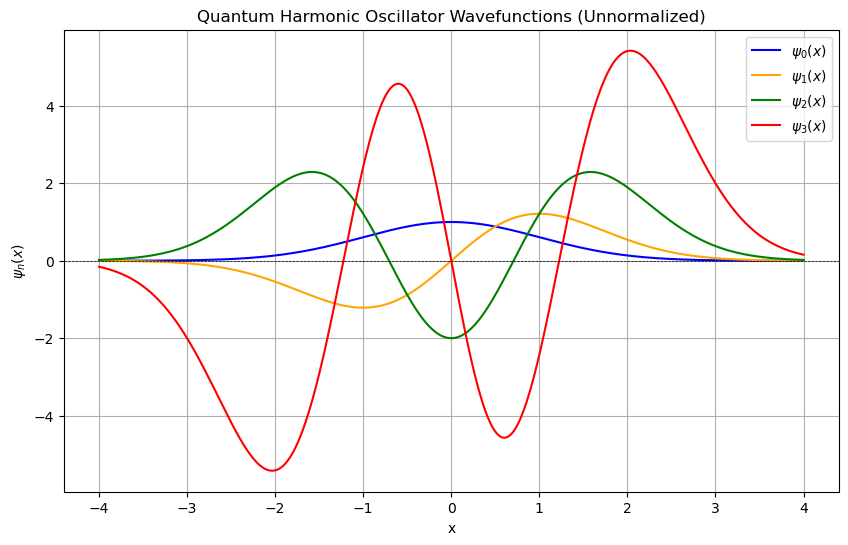

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.hermite import hermval

plt.figure(figsize=(10, 6))

x = np.linspace(-4, 4, 400)

gaussian = np.exp(-x**2/2)

def H0(x): return 1
def H1(x): return 2*x
def H2(x): return 4*x**2 - 2
def H3(x): return 8*x**3 - 12*x

psi0 = gaussian * H0(x)
psi1 = gaussian * H1(x)
psi2 = gaussian * H2(x)
psi3 = gaussian * H3(x)

plt.plot(x, psi0, label=r'$\psi_0(x)$', color='blue')
plt.plot(x, psi1, label=r'$\psi_1(x)$', color='orange')
plt.plot(x, psi2, label=r'$\psi_2(x)$', color='green')
plt.plot(x, psi3, label=r'$\psi_3(x)$', color='red')
plt.title('Quantum Harmonic Oscillator Wavefunctions (Unnormalized)')
plt.xlabel('x')
plt.ylabel(r'$\psi_n(x)$')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.legend()
plt.grid()
plt.show()


Idea is to take the formula $f(x) = exp(-\frac{(x-b)^2}{2c^2})$ and multiply it by the first Hermite polynomial, which we of course need to shift to point $b$

This gives us the following function:

$$\psi_1(x) = (x-b) \cdot exp(-\frac{(x-b)^2}{2c^2})$$

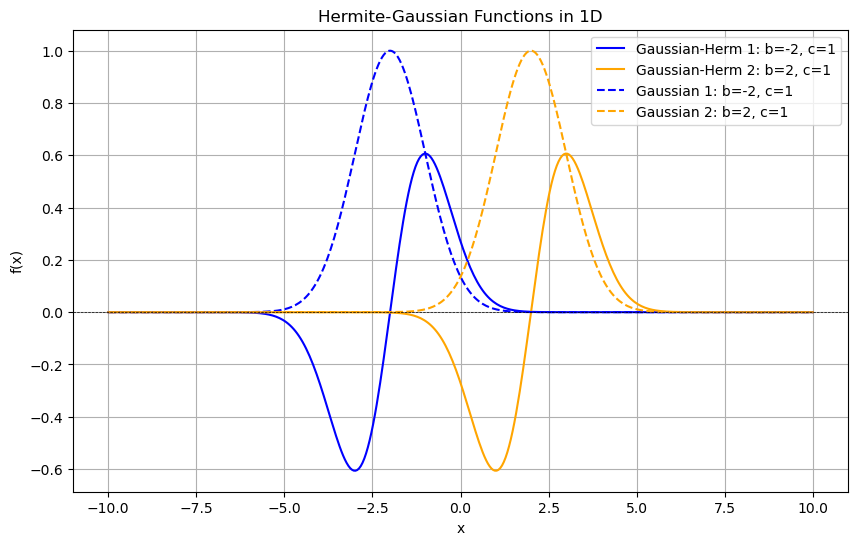

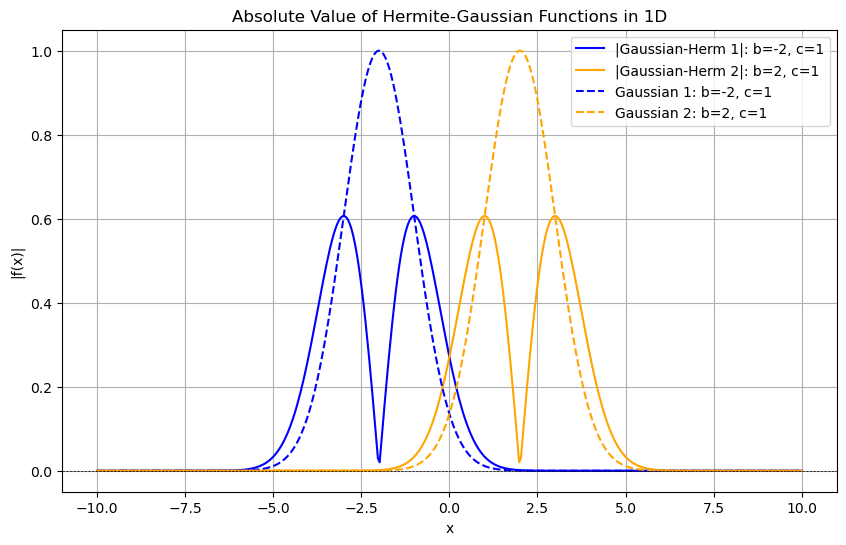

In [5]:
# Lets plot two functions of this type in 1D

def plot_hermite_gaussian_1d(b1, c1,b2,c2):
    """ 
    Plots two hermite gaussian functions in 1D
    """

    x = np.linspace(-10, 10, 400)
    gaussian1 = np.exp(-((x - b1)**2) / (2 * c1**2))
    gaussian2 = np.exp(-((x - b2)**2) / (2 * c2**2))
    gaussian1_herm = np.exp(-((x - b1)**2) / (2 * c1**2)) * (x-b1)
    gaussian2_herm = np.exp(-((x - b2)**2) / (2 * c2**2)) * (x-b2)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, gaussian1_herm, label=f'Gaussian-Herm 1: b={b1}, c={c1}', color='blue')
    plt.plot(x, gaussian2_herm, label=f'Gaussian-Herm 2: b={b2}, c={c2}', color='orange')
    plt.plot(x,gaussian1, label=f'Gaussian 1: b={b1}, c={c1}', color='blue', ls='--')
    plt.plot(x,gaussian2, label=f'Gaussian 2: b={b2}, c={c2}', color='orange', ls='--')
    plt.title('Hermite-Gaussian Functions in 1D')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.legend()
    plt.grid()
    plt.show()

def plot_absolute_value_hermite_gaussian_1d(b1, c1,b2,c2):
    """ 
    Plots the absolute value of two hermite gaussian functions in 1D
    """

    x = np.linspace(-10, 10, 400)
    gaussian1 = np.exp(-((x - b1)**2) / (2 * c1**2))
    gaussian2 = np.exp(-((x - b2)**2) / (2 * c2**2))
    gaussian1_herm = np.exp(-((x - b1)**2) / (2 * c1**2)) * (x-b1)
    gaussian2_herm = np.exp(-((x - b2)**2) / (2 * c2**2)) * (x-b2)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, np.abs(gaussian1_herm), label=f'|Gaussian-Herm 1|: b={b1}, c={c1}', color='blue')
    plt.plot(x, np.abs(gaussian2_herm), label=f'|Gaussian-Herm 2|: b={b2}, c={c2}', color='orange')
    plt.plot(x,gaussian1, label=f'Gaussian 1: b={b1}, c={c1}', color='blue', ls='--')
    plt.plot(x,gaussian2, label=f'Gaussian 2: b={b2}, c={c2}', color='orange', ls='--')
    plt.title('Absolute Value of Hermite-Gaussian Functions in 1D')
    plt.xlabel('x')
    plt.ylabel('|f(x)|')
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.legend()
    plt.grid()
    plt.show()



plot_hermite_gaussian_1d(b1=-2, c1=1, b2=2, c2=1)

plot_absolute_value_hermite_gaussian_1d(b1=-2, c1=1, b2=2, c2=1)

# Product Function

We want to express the product of two such functions, which is given by:

$$f_1\cdot f_2 = (x-b_1) \cdot exp(-\frac{(x-b_1)^2}{2c_1^2}) \cdot (x-b_2) \cdot exp(-\frac{(x-b_2)^2}{2c_2^2})$$

The formula i calculated is

$$f_1 \cdot f_2 = exp(-\frac{(b_1 - b_2)^2}{2(c_1^2 + c_2^2)}) \cdot (x-b_1) \cdot (x-b_2) \cdot exp(-\frac{(x- \mu)^2}{2\sigma^2})$$

Where $\mu = \frac{c_2^2 b_1 + c_1^2 b_2}{c_1^2 + c_2^2}$ and $\sigma^2 = \frac{c_1^2 c_2^2}{c_1^2 + c_2^2}$



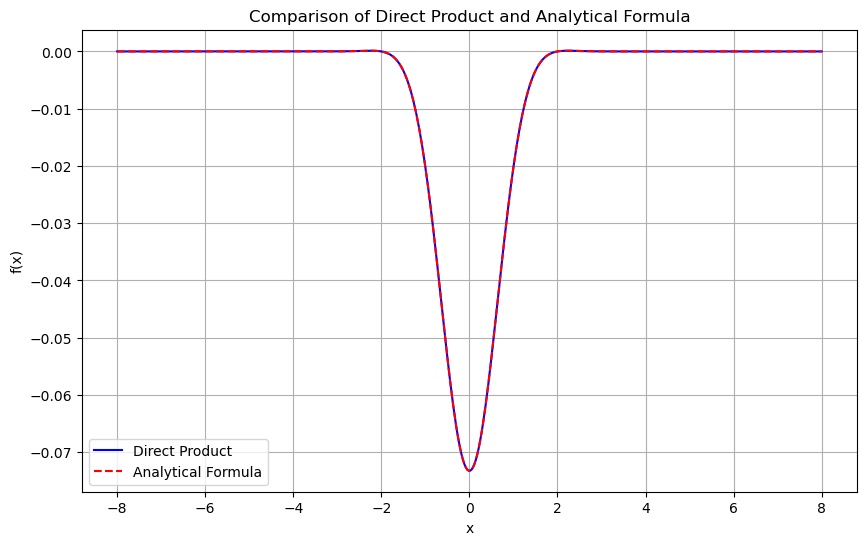

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def product_formula(x, b1, c1, b2, c2):
    mu = (c2**2 * b1 + c1**2 * b2) / (c1**2 + c2**2)
    sigma2 = (c1**2 * c2**2) / (c1**2 + c2**2)
    prefactor = np.exp(-((b1 - b2)**2) / (2 * (c1**2 + c2**2)))
    return prefactor * (x - b1) * (x - b2) * np.exp(-((x - mu)**2) / (2 * sigma2))

def direct_product(x, b1, c1, b2, c2):
    f1 = (x - b1) * np.exp(-((x - b1)**2) / (2 * c1**2))
    f2 = (x - b2) * np.exp(-((x - b2)**2) / (2 * c2**2))
    return f1 * f2

# Parameters
b1, c1 = -2, 1
b2, c2 = 2, 1

x = np.linspace(-8, 8, 500)
y_formula = product_formula(x, b1, c1, b2, c2)
y_direct = direct_product(x, b1, c1, b2, c2)

plt.figure(figsize=(10,6))
plt.plot(x, y_direct, label="Direct Product", color="blue")
plt.plot(x, y_formula, '--', label="Analytical Formula", color="red")
plt.title("Comparison of Direct Product and Analytical Formula")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

# Overlap Integral

After some tedious calculations, the overlap integral is given by:

$S = \sqrt{2 \pi}\sigma^3 \exp(-\frac{\Delta b ² }{2(c_1^2 + c_2^2)})\cdot (1- \frac{\Delta b^2}{c_1^2 + c_2^2})$

Where $\Delta b = b_1 - b_2$



Testing Overlap Integral Formulas
b1   c1   b2   c2   Analytical   Numerical    Difference
------------------------------------------------------------
-2   1    2    1    -0.113623    -0.113623    0.000000  
0    1    1    1    0.345097     0.345097     0.000000  
-1   0.5  1    1.5  -0.072124    -0.072124    0.000000  
0    1    0    1    0.886227     0.886227     0.000000  
-3   2    3    2    -2.615414    -2.615414    0.000000  


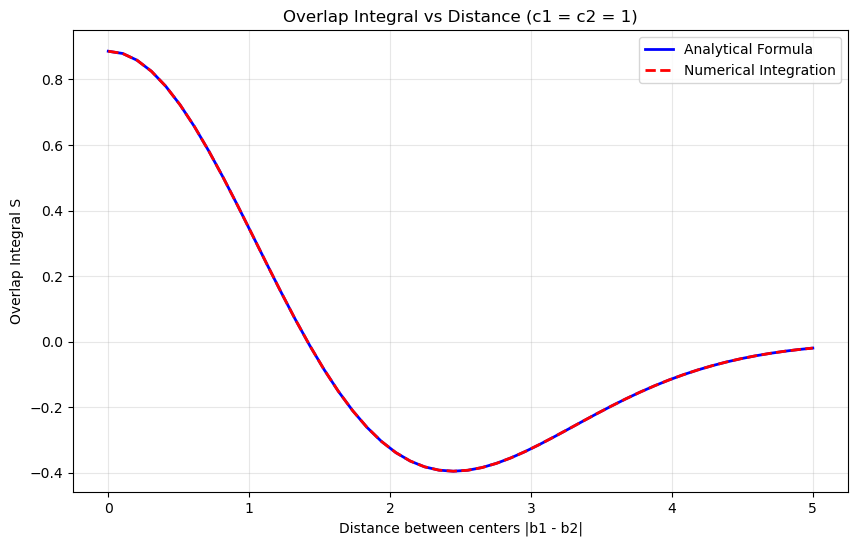

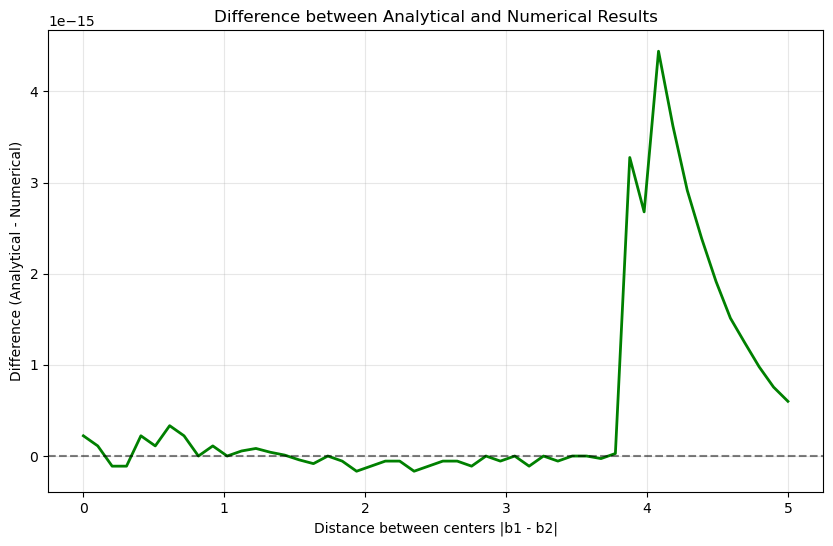

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

def overlap_integral_analytical(b1, c1, b2, c2):
    """
    Calculate the overlap integral using the analytical formula:
    S = sqrt(2*pi) * sigma^3 * exp(-Delta_b^2 / (2*(c1^2 + c2^2))) * (1 - Delta_b^2 / (c1^2 + c2^2))
    
    Where:
    - Delta_b = b1 - b2
    - sigma^2 = (c1^2 * c2^2) / (c1^2 + c2^2)
    """
    delta_b = b1 - b2
    sigma_squared = (c1**2 * c2**2) / (c1**2 + c2**2)
    sigma = np.sqrt(sigma_squared)
    
    # Calculate the overlap integral
    exponential_term = np.exp(-(delta_b**2) / (2 * (c1**2 + c2**2)))
    bracket_term = 1 - (delta_b**2) / (c1**2 + c2**2)
    
    S = np.sqrt(2 * np.pi) * (sigma**3) * exponential_term * bracket_term
    
    return S

def overlap_integral_numerical(b1, c1, b2, c2, x_range=(-10, 10)):
    """
    Calculate the overlap integral numerically by integrating the product of the two functions
    """
    def integrand(x):
        f1 = (x - b1) * np.exp(-((x - b1)**2) / (2 * c1**2))
        f2 = (x - b2) * np.exp(-((x - b2)**2) / (2 * c2**2))
        return f1 * f2
    
    result, _ = integrate.quad(integrand, x_range[0], x_range[1])
    return result

# Test the formulas with different parameters
test_cases = [
    (-2, 1, 2, 1),    # b1, c1, b2, c2
    (0, 1, 1, 1),
    (-1, 0.5, 1, 1.5),
    (0, 1, 0, 1),     # Same position
    (-3, 2, 3, 2),
]

print("Testing Overlap Integral Formulas")
print("="*60)
print(f"{'b1':<4} {'c1':<4} {'b2':<4} {'c2':<4} {'Analytical':<12} {'Numerical':<12} {'Difference':<10}")
print("-"*60)

for b1, c1, b2, c2 in test_cases:
    S_analytical = overlap_integral_analytical(b1, c1, b2, c2)
    S_numerical = overlap_integral_numerical(b1, c1, b2, c2)
    difference = abs(S_analytical - S_numerical)
    
    print(f"{b1:<4} {c1:<4} {b2:<4} {c2:<4} {S_analytical:<12.6f} {S_numerical:<12.6f} {difference:<10.6f}")

# Visualize how overlap integral changes with distance
distances = np.linspace(0, 5, 50)
overlaps_analytical = []
overlaps_numerical = []

c1, c2 = 1, 1  # Fixed widths
for d in distances:
    b1, b2 = -d/2, d/2  # Symmetric positions
    S_analytical = overlap_integral_analytical(b1, c1, b2, c2)
    S_numerical = overlap_integral_numerical(b1, c1, b2, c2)
    overlaps_analytical.append(S_analytical)
    overlaps_numerical.append(S_numerical)

plt.figure(figsize=(10, 6))
plt.plot(distances, overlaps_analytical, 'b-', label='Analytical Formula', linewidth=2)
plt.plot(distances, overlaps_numerical, 'r--', label='Numerical Integration', linewidth=2)
plt.xlabel('Distance between centers |b1 - b2|')
plt.ylabel('Overlap Integral S')
plt.title('Overlap Integral vs Distance (c1 = c2 = 1)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Show the difference between analytical and numerical
plt.figure(figsize=(10, 6))
differences = np.array(overlaps_analytical) - np.array(overlaps_numerical)
plt.plot(distances, differences, 'g-', linewidth=2)
plt.xlabel('Distance between centers |b1 - b2|')
plt.ylabel('Difference (Analytical - Numerical)')
plt.title('Difference between Analytical and Numerical Results')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
plt.show()

Testing Gaussian Overlap Integral Formulas
b1   c1   b2   c2   Analytical   Numerical    Difference   Rel Error %
----------------------------------------------------------------------
-2   1    2    1    0.032464     0.032464     6.94e-18     2.14e-14  
0    1    1    1    1.380388     1.380388     2.22e-16     1.61e-14  
-1   0.5  1    1.5  0.534251     0.534251     1.11e-16     2.08e-14  
0    1    0    1    1.772454     1.772454     4.44e-16     2.51e-14  
-3   2    3    2    0.373631     0.373631     5.74e-13     1.54e-10  
1    0.8  1.5  1.2  1.571195     1.571195     0.00e+00     0.00e+00  


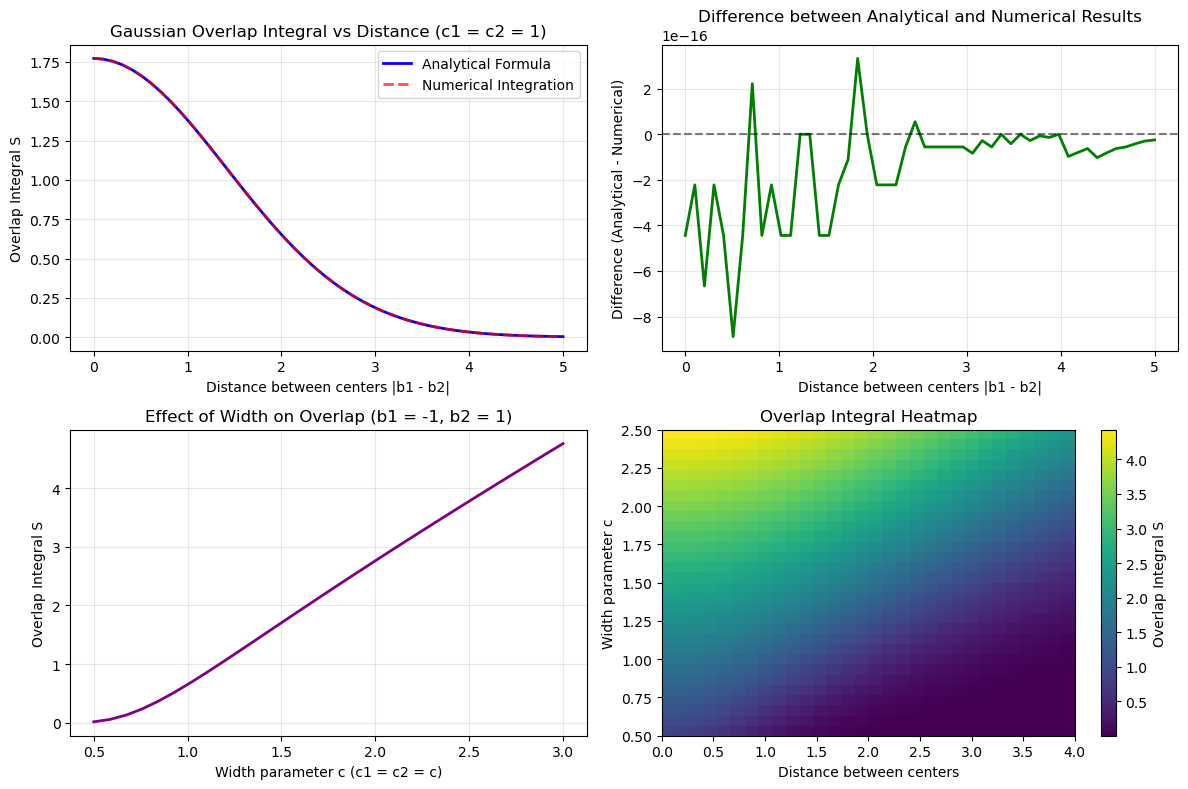


Special Cases:
Same position (b1=b2=0, c1=c2=1): S = 1.772454
Expected: sqrt(pi) ≈ 1.772454
Same position, different widths (c1=1, c2=2): S = 2.241996
Expected: sqrt(pi/1.25) ≈ 1.585331


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

def gaussian_overlap_analytical(b1, c1, b2, c2):
    """
    Calculate the overlap integral for normal Gaussian functions using the analytical formula:
    S = (2*pi*c1^2*c2^2 / (c1^2 + c2^2))^(3/2) * exp(-(b1-b2)^T(b1-b2) / (2*(c1^2 + c2^2)))
    
    For 1D case, this simplifies to:
    S = sqrt(2*pi) * (c1*c2/sqrt(c1^2 + c2^2)) * exp(-(b1-b2)^2 / (2*(c1^2 + c2^2)))
    """
    delta_b = b1 - b2
    
    # Calculate the prefactor
    variance_sum = c1**2 + c2**2
    prefactor = np.sqrt(2 * np.pi) * (c1 * c2) / np.sqrt(variance_sum)
    
    # Calculate the exponential term
    exponential_term = np.exp(-(delta_b**2) / (2 * variance_sum))
    
    S = prefactor * exponential_term
    
    return S

def gaussian_overlap_numerical(b1, c1, b2, c2, x_range=(-10, 10)):
    """
    Calculate the overlap integral numerically by integrating the product of two Gaussian functions
    """
    def integrand(x):
        f1 = np.exp(-((x - b1)**2) / (2 * c1**2))
        f2 = np.exp(-((x - b2)**2) / (2 * c2**2))
        return f1 * f2
    
    result, _ = integrate.quad(integrand, x_range[0], x_range[1])
    return result

# Test the formulas with different parameters
test_cases = [
    (-2, 1, 2, 1),    # b1, c1, b2, c2
    (0, 1, 1, 1),
    (-1, 0.5, 1, 1.5),
    (0, 1, 0, 1),     # Same position
    (-3, 2, 3, 2),
    (1, 0.8, 1.5, 1.2),
]

print("Testing Gaussian Overlap Integral Formulas")
print("="*70)
print(f"{'b1':<4} {'c1':<4} {'b2':<4} {'c2':<4} {'Analytical':<12} {'Numerical':<12} {'Difference':<12} {'Rel Error %':<10}")
print("-"*70)

for b1, c1, b2, c2 in test_cases:
    S_analytical = gaussian_overlap_analytical(b1, c1, b2, c2)
    S_numerical = gaussian_overlap_numerical(b1, c1, b2, c2)
    difference = abs(S_analytical - S_numerical)
    rel_error = (difference / abs(S_numerical)) * 100 if S_numerical != 0 else float('inf')
    
    print(f"{b1:<4} {c1:<4} {b2:<4} {c2:<4} {S_analytical:<12.6f} {S_numerical:<12.6f} {difference:<12.2e} {rel_error:<10.2e}")

# Visualize how overlap integral changes with distance
distances = np.linspace(0, 5, 50)
overlaps_analytical = []
overlaps_numerical = []

c1, c2 = 1, 1  # Fixed widths
for d in distances:
    b1, b2 = -d/2, d/2  # Symmetric positions
    S_analytical = gaussian_overlap_analytical(b1, c1, b2, c2)
    S_numerical = gaussian_overlap_numerical(b1, c1, b2, c2)
    overlaps_analytical.append(S_analytical)
    overlaps_numerical.append(S_numerical)

plt.figure(figsize=(12, 8))

# Plot 1: Overlap vs Distance
plt.subplot(2, 2, 1)
plt.plot(distances, overlaps_analytical, 'b-', label='Analytical Formula', linewidth=2)
plt.plot(distances, overlaps_numerical, 'r--', label='Numerical Integration', linewidth=2, alpha=0.7)
plt.xlabel('Distance between centers |b1 - b2|')
plt.ylabel('Overlap Integral S')
plt.title('Gaussian Overlap Integral vs Distance (c1 = c2 = 1)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Difference between methods
plt.subplot(2, 2, 2)
differences = np.array(overlaps_analytical) - np.array(overlaps_numerical)
plt.plot(distances, differences, 'g-', linewidth=2)
plt.xlabel('Distance between centers |b1 - b2|')
plt.ylabel('Difference (Analytical - Numerical)')
plt.title('Difference between Analytical and Numerical Results')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)

# Plot 3: Effect of width parameters
plt.subplot(2, 2, 3)
widths = np.linspace(0.5, 3, 30)
b1, b2 = -1, 1  # Fixed positions
overlaps_width = []
for w in widths:
    S = gaussian_overlap_analytical(b1, w, b2, w)  # Same width for both
    overlaps_width.append(S)

plt.plot(widths, overlaps_width, 'purple', linewidth=2)
plt.xlabel('Width parameter c (c1 = c2 = c)')
plt.ylabel('Overlap Integral S')
plt.title('Effect of Width on Overlap (b1 = -1, b2 = 1)')
plt.grid(True, alpha=0.3)

# Plot 4: 2D heatmap of overlap vs distance and width
plt.subplot(2, 2, 4)
distances_2d = np.linspace(0, 4, 30)
widths_2d = np.linspace(0.5, 2.5, 30)
D, W = np.meshgrid(distances_2d, widths_2d)
S_2d = np.zeros_like(D)

for i, d in enumerate(distances_2d):
    for j, w in enumerate(widths_2d):
        b1, b2 = -d/2, d/2
        S_2d[j, i] = gaussian_overlap_analytical(b1, w, b2, w)

im = plt.imshow(S_2d, extent=[0, 4, 0.5, 2.5], aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(im, label='Overlap Integral S')
plt.xlabel('Distance between centers')
plt.ylabel('Width parameter c')
plt.title('Overlap Integral Heatmap')

plt.tight_layout()
plt.show()

# Test special cases
print("\nSpecial Cases:")
print("="*40)
# Same position, same width
S = gaussian_overlap_analytical(0, 1, 0, 1)
print(f"Same position (b1=b2=0, c1=c2=1): S = {S:.6f}")
print(f"Expected: sqrt(pi) ≈ {np.sqrt(np.pi):.6f}")

# Different widths, same position  
S = gaussian_overlap_analytical(0, 1, 0, 2)
print(f"Same position, different widths (c1=1, c2=2): S = {S:.6f}")
print(f"Expected: sqrt(pi/1.25) ≈ {np.sqrt(np.pi/1.25):.6f}")